In [95]:
# Python program to read
# image using matplotlib
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw, ImageFilter

1


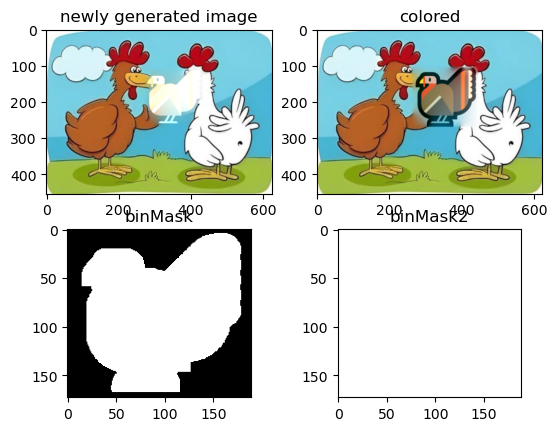

In [25]:

# get og image
image1 = cv2.imread('./resources/chick1.png')
width, height = (image1.shape[0],image1.shape[1])
ogImg = image1.copy()

# get Turkey !
smol_turkey = cv2.imread('./resources/turkey.png')
## get mask for background segmentation 
bin_threshold = 10

smol_turkey_gray = cv2.cvtColor(smol_turkey, cv2.COLOR_BGR2GRAY)
binMask = smol_turkey_gray < bin_threshold #forming the binary image
binMask.dtype='uint8' #range 0-1

# Get new mask from contours
contours,hierarchy = cv2.findContours(binMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) == 0:
    print("cant find contours")
    quit()
else:
    print(len(contours))

binMask = cv2.cvtColor(binMask,cv2.COLOR_GRAY2RGB)
cv2.drawContours(binMask, [contours[0]], 0, (255,255,255), -1) # -1 fills contour's inside # bettermask

binMask2 = np.zeros(smol_turkey.shape,smol_turkey.dtype)+255
binMask2 = np.zeros(smol_turkey.shape,'uint8')+255

# add turkey in image
number_of_turkeys = 1
x = int(random.randint(40, width-40))
y = int(random.randint(40, height-40))

image1 = cv2.seamlessClone(smol_turkey, ogImg, binMask, [x,y], cv2.NORMAL_CLONE) #binMask can be 1 or 3 channels
image2 = cv2.seamlessClone(smol_turkey, ogImg, binMask2, [x,y], cv2.NORMAL_CLONE)

#Display
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
 
fig = plt.figure()

ax = fig.add_subplot(2,2,1)
ax.imshow(image1)
ax.title.set_text('newly generated image')

ax = fig.add_subplot(2,2,3)
ax.imshow(binMask)
ax.title.set_text('binMask')

ax = fig.add_subplot(2,2,4)
ax.imshow(binMask2)
ax.title.set_text('binMask2')

ax = fig.add_subplot(2,2,2)
ax.imshow(image2)
ax.title.set_text('colored')

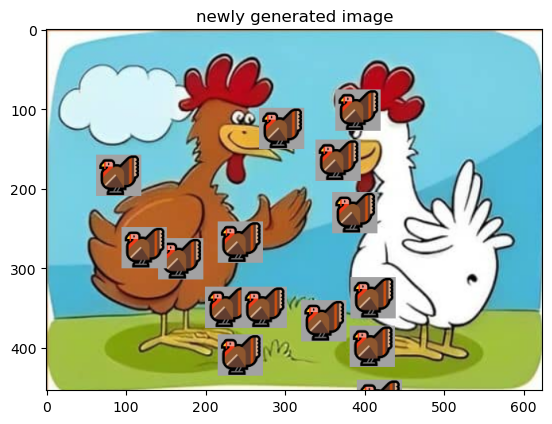

In [117]:
# get og image
image1 = cv2.imread('./resources/chick1.png')
width, height = (image1.shape[0],image1.shape[1])
image1 = Image.fromarray(image1) #convert cv2 format to PIL
# get Turkey !
smol_turkey = cv2.imread('./resources/turkey.png')
resize_scale = 0.3
smol_turkey = cv2.resize(smol_turkey,None,None,resize_scale,resize_scale)

smol_turkey = Image.fromarray(smol_turkey) #convert cv2 format to PIL

#add  2 turkeys randomly !! because, why not ? :v
number_of_turkeys = 20
for i in range(number_of_turkeys):
    x = int(random.randint(40, width-40))
    y = int(random.randint(40, height-50))
    image1.paste(smol_turkey, [x,y])

#Display
image1 = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(image1)
# ax.imshow(binMask)
ax.title.set_text('newly generated image')

In [32]:
import numpy as np